## **Pre-Processing**

# **BIRCH Clustering**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

df_cluster = pd.read_csv('bank_marketing_dataset.csv')

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'])

numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns

X_preprocessed_df = df_cluster.copy()
X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols),
                                   index=X_preprocessed_df.index)

X_no_encoded = X_preprocessed_df.copy()

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [3]:
prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

In [4]:
continuous_data = X_preprocessed_df.drop(columns=one_hot_cols, axis=1)

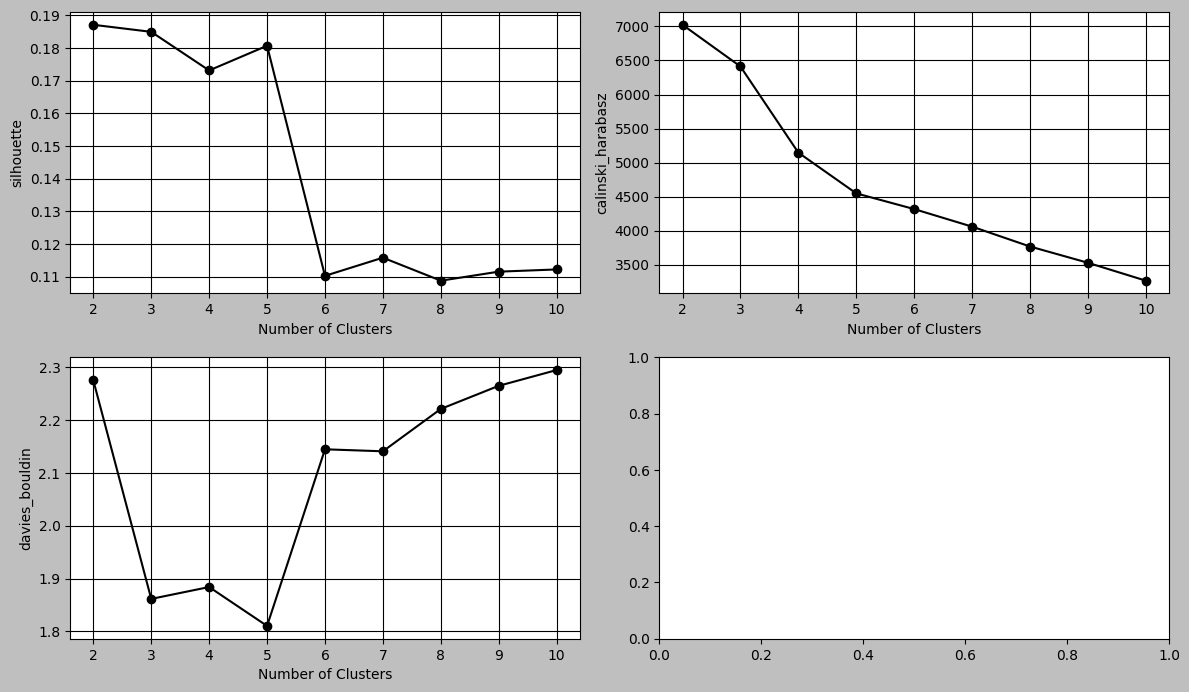

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Lists to store scores
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# Iterate over a range of cluster numbers from 2 to 10
for k in range(2, 11):
    # BIRCH Clustering with the number of clusters 'k'
    birch = Birch(n_clusters=k)
    cluster_labels = birch.fit_predict(X_preprocessed_df)

    # Calculate silhouette score
    score = silhouette_score(X_preprocessed_df, cluster_labels)
    silhouette.append(score)

    # Calculate Calinski-Harabasz score
    score1 = calinski_harabasz_score(X_preprocessed_df, cluster_labels)
    calinski_harabasz.append(score1)

    # Calculate Davies-Bouldin score
    score2 = davies_bouldin_score(X_preprocessed_df, cluster_labels)
    davies_bouldin.append(score2)

# Plotting the metrics
plt.style.use('grayscale')
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

metrics = {'silhouette': silhouette, 'calinski_harabasz': calinski_harabasz,
           'davies_bouldin': davies_bouldin}
metrics_list = list(metrics.items())

for i in range(2):
    for j in range(2):
        index = i * 2 + j
        if index < len(metrics_list):
            metric_name, metric_values = metrics_list[index]
            axs[i, j].plot(range(2, 11), metric_values, marker='o')
            axs[i, j].set_xticks(range(2, 11))
            axs[i, j].set_xlabel('Number of Clusters')
            axs[i, j].set_ylabel(metric_name)
            axs[i, j].grid(True)

plt.tight_layout()
plt.show()


**From the elbows we chose number of clusters = 5**

In [6]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# BIRCH Clustering with 5 clusters
birch = Birch(n_clusters=5)
cluster_labels = birch.fit_predict(continuous_data)

# Calculate silhouette score
silhouette_s = silhouette_score(continuous_data, cluster_labels)
print("Silhouette score: ", silhouette_s)

# Calculate Calinski-Harabasz score
ch_s = calinski_harabasz_score(continuous_data, cluster_labels)
print("Calinski-Harabasz score: ", ch_s)

# Calculate Davies-Bouldin score
db_s = davies_bouldin_score(continuous_data, cluster_labels)
print("Davies-Bouldin score: ", db_s)


Silhouette score:  0.31505341680810817
Calinski-Harabasz score:  9105.185690548631
Davies-Bouldin score:  1.0915818042907042


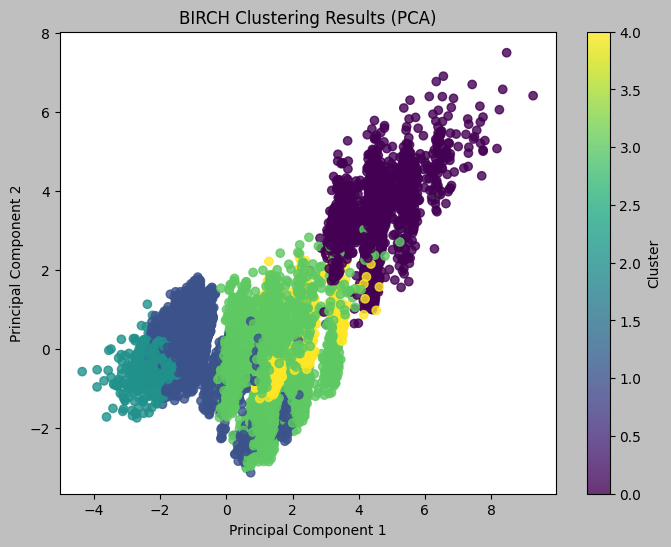

In [7]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(continuous_data)

# Plot clusters in the reduced 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
plt.title('BIRCH Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [9]:
unique_labels = np.unique(cluster_labels)
print("Unique cluster labels:", unique_labels)


Unique cluster labels: [0 1 2 3 4]


In [10]:
print(cluster_analysis.head())

cluster              0             1           2             3            4
age count  1515.000000  25606.000000  298.000000  12026.000000  1743.000000
    mean     41.852805     40.519097   39.550336     38.066689    44.748135
    std      15.296112      9.314061    9.467959     10.450623    16.270821
    min      17.000000     19.000000   24.000000     18.000000    17.000000
    25%      30.000000     33.000000   32.000000     31.000000    32.000000


In [8]:
import pandas as pd

# Assign cluster labels to DataFrame
df_cluster['cluster'] = cluster_labels

# Perform cluster analysis using describe()
cluster_analysis = df_cluster.groupby('cluster').describe().T

# Remove pandas display row limit to show all rows
pd.set_option('display.max_rows', None)

# Display cluster analysis
print(cluster_analysis)


cluster                         0             1            2             3  \
age            count  1515.000000  25606.000000   298.000000  12026.000000   
               mean     41.852805     40.519097    39.550336     38.066689   
               std      15.296112      9.314061     9.467959     10.450623   
               min      17.000000     19.000000    24.000000     18.000000   
               25%      30.000000     33.000000    32.000000     31.000000   
               50%      37.000000     40.000000    38.000000     36.000000   
               75%      52.000000     48.000000    47.000000     43.000000   
               max      98.000000     72.000000    59.000000     95.000000   
duration       count  1515.000000  25606.000000   298.000000  12026.000000   
               mean    321.485809    250.433883    64.533557    270.190171   
               std     254.676128    259.980007   127.055281    259.715633   
               min       1.000000      0.000000     4.000000    